# <center>***机器学习——数据预处理***<center>

更多代码欢迎传送至：
>https://gitee.com/tanxin12/tanxin

## <font color=#FF0000>**1、导入模块和数据**

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [20]:
df1 = pd.read_csv(".\\Data\\train_u6lujuX_CVtuZ9i.csv")
df1 = df1.drop("Loan_ID", axis=1)

filename = ".\\data\\Boston.txt"
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "PRICE"]
df2 = pd.read_csv(filename, sep="\s+", names=names)

## <font color=#FF0000>**2、数据探索（EDA）**

### <center>**描述性统计分析**<center>

In [21]:
# 查看数据
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
# 数据的特征名称及其类型
df1.info()

# 输出数据的特征名称
df1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
# 数值特征的统计量
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [24]:
# 针对分类特征的类别简单统计
df1['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## <font color=#FF0000>**3、数据清洗**

### <center>**缺失值的检查与处理**

In [25]:
# 输出缺失值
print(df1.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [26]:
# 查看特征 "LoanAmount" 缺失的比例，比例小就填补，比例大就直接删掉
print('Percent of missing "LoanAmount" records is %.2f%%' % ((df1['LoanAmount'].isnull().sum()/df1.shape[0])*100))

Percent of missing "LoanAmount" records is 3.58%


In [27]:
# 使用指定数值填补缺失值（比如3）
# df1['Gender'].fillna(3, inplace=True)

# 分类、序数特征用的是众数填补缺失值，mode()后面的[0]是为了避免数据中不止一个众数
# df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)

# 数值特征用中位数填补缺失值
# df1['LoanAmount'].fillna(df1['LoanAmount'].median(), inplace=True)

# 数值特征用均值填补缺失值
# df1['LoanAmount'].fillna(df1['LoanAmount'].mean(), inplace=True)

# 用插值方法填补缺失值，注意如果数据开头就是缺失值，那么那个缺失值不会被插补
# df1['LoanAmount'] = df1['LoanAmount'].interpolate(method="linear", axis=0)

# 直接删掉含有缺失值的单位
# df1 = df1.dropna()

### <center>**离群值的检查与处理**

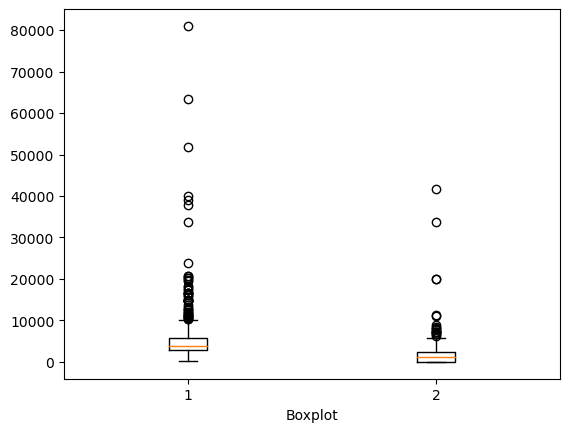

In [28]:
plt.boxplot(df1[["ApplicantIncome", "CoapplicantIncome"]])
plt.xlabel("Boxplot")
plt.show()

In [29]:
"""
# 替换不在正常范围内的值
df1.loc[df1.ApplicantIncome > 1000000000000,  "ApplicantIncome"] = 100
df1.loc[df1.ApplicantIncome < -100000000000,  "ApplicantIncome"] = 100

# 中度偏态：平方根处理（面对的是614行数据）
x_sqrt = np.zeros(shape=(614, 1))
for i in range(0, 614):
    x_sqrt[i] = math.sqrt(np.array(df1.ApplicantIncome)[i])
ApplicantIncome_sqrt = pd.DataFrame(x_sqrt)

# 高度偏态：对数化处理
ApplicantIncome_log = pd.DataFrame(np.log(df1.ApplicantIncome))
"""

'\n# 替换不在正常范围内的值\ndf1.loc[df1.ApplicantIncome > 1000000000000,  "ApplicantIncome"] = 100\ndf1.loc[df1.ApplicantIncome < -100000000000,  "ApplicantIncome"] = 100\n\n# 中度偏态：平方根处理（面对的是614行数据）\nx_sqrt = np.zeros(shape=(614, 1))\nfor i in range(0, 614):\n    x_sqrt[i] = math.sqrt(np.array(df1.ApplicantIncome)[i])\nApplicantIncome_sqrt = pd.DataFrame(x_sqrt)\n\n# 高度偏态：对数化处理\nApplicantIncome_log = pd.DataFrame(np.log(df1.ApplicantIncome))\n'

In [30]:
# 处理完后查看：直方图
# plt.hist(ApplicantIncome_log[np.isfinite(ApplicantIncome_log)].values, bins = 100)
# plt.show()
# plt.hist(ApplicantIncome_sqrt[np.isfinite(ApplicantIncome_sqrt)].values, bins = 100)
# plt.show()

## <font color=#FF0000>**4、数据处理小tips**

### **<center>删除某列为指定元素的行**

In [32]:
# 删除数据集df1中ApplicantIncome的值为'value'的样本
df2 = df1[df1['ApplicantIncome'] != 'value']

### **<center>上采样**

In [33]:
# 计算每个标签的样本数量
counts = df1['Self_Employed'].value_counts()

# 计算最多的标签的样本数量
max_count = counts.max()

# 上采样每个标签，使得每个标签的样本数量都为 max_count
df2 = pd.concat([df1[df1['Self_Employed'] == label].sample(max_count, replace=True) for label in counts.index])